In [1]:
import bauer
from bauer.utils.data import load_garcia2022
import seaborn as sns

In [2]:
df = load_garcia2022()

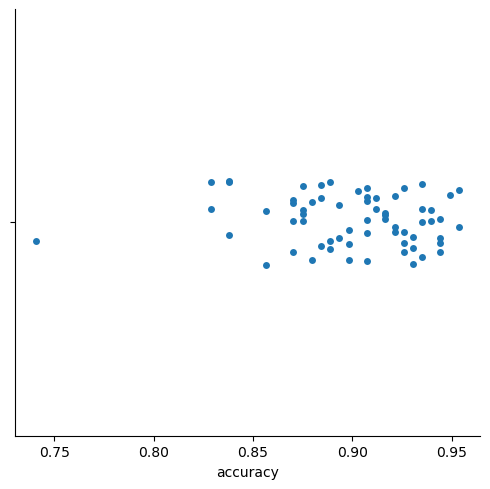

In [3]:
tmp = df[['accuracy']].groupby('subject').mean().reset_index()

sns.catplot(tmp, x='accuracy')

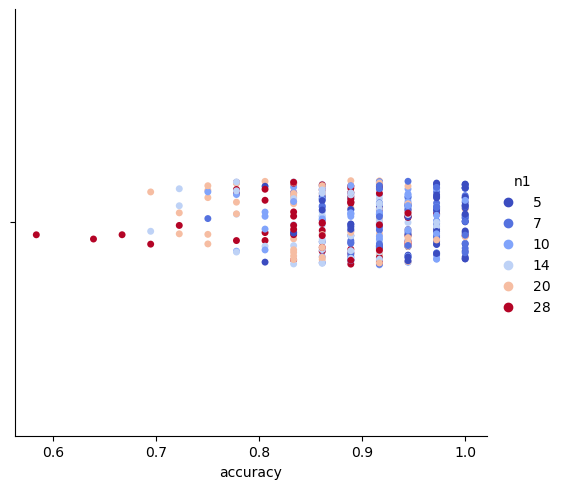

In [4]:
tmp = df[['accuracy', 'n1']].groupby(['subject', 'n1']).mean().reset_index()

sns.catplot(tmp, x='accuracy', hue='n1', palette='coolwarm')

In [5]:
df['frac_'] = df['n2'] / df['n1']
import pandas as pd
df['frac'] = pd.qcut(df['frac_'], 6).apply(lambda x: x.mid).astype(float).round(1)
# df['frac'] = df['frac_']

<AxesSubplot: xlabel='frac', ylabel='choice'>

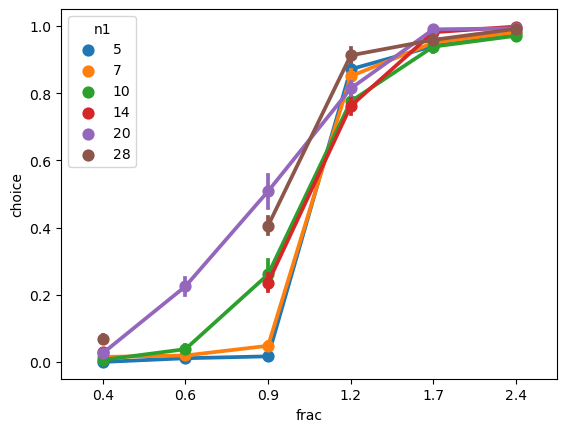

In [6]:
sns.pointplot(df.groupby(['subject', 'frac', 'n1']).mean().reset_index(), x='frac', hue='n1', y='choice', errorbar='se')